# AVIRIS Data - Discovery, Access and Analysis
##  SBG Science and Applications Technical Interchange Meeting
 

![SBG](../images/SBG_NASAAirborne_logo.png)

**Date:** Tuesday May 20, 2025

**Instructors:**  Michele Thornton, Rupesh Shrestha

***

## Overview 

This tutorial will demonstrate NASA Earthdata data discovery and direct access using airborne data derived from the AVIRIS-Next Generation (ANG) instrument collected during the Biodiversity Survey of the Cape (BioSCape) Campaign.  BioSCape is an integrated field and airborne campaign in South Africa's Greater Cape Floristic Region (GCFR) where collections occurred in 2023.  The campaign collected UV/visible to short wavelength infrared (UVSWIR) and thermal imaging spectroscopy and laser altimetry LiDAR data over terrestrial and aquatic targets using four airborne instruments: Airborne Visible InfraRed Imaging Spectrometer - Next Generation (AVIRIS-NG), Portable Remote Imaging SpectroMeter (PRISM), Land, Vegetation, and Ice Sensor (LVIS), and Hyperspectral Thermal Emission Spectrometer (HyTES).

- Learn more about [**BioSCape**](https://www.bioscape.io/)
- Nasa Earthdata Search: [**Discover Earthdata BioSCape Data**](https://search.earthdata.nasa.gov/search?fpj=BioSCape)



The BioSCape Campaign has produced an AVIRIS-NG L3 Resampled Resampled Mosaic dataset.  
-  Surface reflectance data (Level 2b) derived from the AVIRIS-NG instrument were resampled to 5-m spatial resolution and mosaiced into a regular tile system of 807 tiles. A given tile includes multiple AVIRIS-NG scenes from multiple flight lines spanning multiple days.  The mosaics in this dataset were generated by stitching together separate scenes and resampling to 5-m resolution in the Hartebeesthoek94 projected coordinate system (WGS-84 datum, EPSG 9221). The mosaic files are distributed on a tiled grid system, and the tile name is included in the file name. Mosaics were generated by manually grouping sets of flight lines into different chunks that should be placed 'in front of' or 'behind' other chunks. The selection criteria included a combination of the weather during observations, flight conditions, flightbox design, and the time the flight was taken. 

> Brodrick, P.G., A.M. Chlus, R. Eckert, J.W. Chapman, M. Eastwood, S. Geier, M. Helmlinger, S.R. Lundeen, W. Olson-Duvall, R. Pavlick, L.M. Rios, D.R. Thompson, and R.O. Green. 2025. BioSCape: AVIRIS-NG L3 Resampled Reflectance Mosaics, V2. ORNL DAAC, Oak Ridge, Tennessee, USA. [https://doi.org/10.3334/ORNLDAAC/2427](https://doi.org/10.3334/ORNLDAAC/2427)

Dataset [**Data Processing Levels**](https://www.earthdata.nasa.gov/learn/earth-observation-data-basics/data-processing-levels) 
- **Level 3**:  Variables mapped on uniform space-time grid scales, usually with some completeness and consistency.



## AVIRIS Instruments Suite of Facility Instrument and Campaign Data - Discovery, Access and Analysis

- Exercise 1:  Live Demo of Earthdata Search 
- Exercise 2:  Programmatic Discovery and Access:  BioSCape Campaign AVIRIS-NG Resampled Mosaic (L3) Reflectance

# ----------------------------------------------------------------------
## Example 1:  Earthdata Search - AVIRIS Facility Instrument anc Campaigns Collections

# ----------------------------------------------------------------------
## Example 2:  Programmatic Discovery and Access
### - BioSCape AVIRIS-NG Reflectance Level 3 Mosaic Dataset

### Requirements

In [1]:
import earthaccess
earthaccess.__version__
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.ops import transform
import pyproj
from shapely.ops import orient
import xarray as xr
#from xarray.backends.api import open_datatree
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

import hvplot.xarray
import holoviews as hv
hvplot.extension('bokeh')
import math

## Step 1: Authentication and Data Search with earthaccess 

#### **earthaccess** for NASA Earthdata Login and Searching NASA Earthdata Holdings
![earthaccess](../images/earthaccess.png)

#### Earthdata Login

NASA [**`Earthdata Login`**](https://urs.earthdata.nasa.gov/)  is a user registration and profile management system for users getting Earth science data from NASA Earthdata.  If you download or access NASA Earthdata data, you need an Earthdata Login.  

#### earthaccess


[**`earthaccess`**](https://www.earthdata.nasa.gov/news/blog/earthaccess-earth-science-data-simplifiedl) is a Python library that simplifies data discovery and access to NASA Earthdata by providing an abstraction layer to NASA's APIs for programmatic access (EDL and CMR)
- handles authentication with NASA's Earthdata Login (EDL), 
- allows searching of the NASA Earthdata Data holdings using NASA's Common Metadata Repository (CMR), and 
- allows access through fsspec
- and more, check out the link above!

Using `earthaccess` we'll login and authentice to NASA Earthdata Login.
- For this exercise, we will be prompted for and interactively enter our Eathdata Login credentials (login, password)

In [2]:
auth = earthaccess.login()

### Here, we'll use the earthaccess `instrument` keyword to search for data collections that are associated with Airborne Instruments archived through the ORNL DAAC

In [3]:
#results = earthaccess.search_datasets(instrument="AVIRIS-3")
results = earthaccess.search_datasets(instrument="AVIRIS-NG")
#results = earthaccess.search_datasets(instrument="AVIRIS") # AVIRIS-Classic
#results = earthaccess.search_datasets(instrument="MASTER")
#results = earthaccess.search_datasets(instrument="HYTES")
#results = earthaccess.search_datasets(instrument="PRISM")
print(f"Total Datasets (results) found: {len(results)}")

Total Datasets (results) found: 27


We can also search by `Project` knowing our dataset of interest was part of the BioSCape project.

In [4]:
results_projects = earthaccess.search_datasets(project="BioSCape")
print(f"Total Datasets (results_projects) found: {len(results)}")

Total Datasets (results_projects) found: 27


For the instrument=="AVIRIS-NG" search, let's look at the first result to see all of the CMR values that are returned

In [5]:
for index, item in enumerate(results):
    if index == 0:
        summary = item.summary()
        print(summary)

{'short-name': 'ABoVE_Airborne_AVIRIS_NG_V3_2362', 'concept-id': 'C3253178409-ORNL_CLOUD', 'version': '3', 'file-type': "[{'Format': 'multiple', 'TotalCollectionFileSize': 13.327, 'TotalCollectionFileSizeUnit': 'TB'}]", 'get-data': [], 'cloud-info': {'Region': 'us-west-2', 'S3CredentialsAPIEndpoint': 'https://data.ornldaac.earthdata.nasa.gov/s3credentials', 'S3CredentialsAPIDocumentationURL': 'https://data.ornldaac.earthdata.nasa.gov/s3credentialsREADME'}}


In [6]:
for item in results:
    summary = item.summary()
    print(summary["short-name"])

ABoVE_Airborne_AVIRIS_NG_V3_2362
AVIRIS-NG_Data_Idaho_1533
AVIRIS-NG_L1B_radiance_2095
AVIRIS-NG_L2_Reflectance_2110
AVIRIS_FlightLine_Locator_2140
BioSCape_ANG_V02_L3_RFL_Mosaic_2427
CH4_Plume_AVIRIS-NG_1727
COMEX_AVIRIS_NG_Flights_2342
DeltaX_L1_AVIRIS_Radiance_1987
DeltaX_L2A_AVIRIS-NG_BRDF_V3_2355
DeltaX_L2_AVIRIS_Reflectance_1988
DeltaX_L3_AVIRIS-NG_AGB_V2_2138
DeltaX_L3_AVIRIS-NG_Veg_Types_2352
DeltaX_L3_AVIRIS-NG_Water_V3_2152
PreDeltaX_L2_AVIRIS_SR_1826
PreDeltaX_L3_AVIRIS_Biomass_1821
PreDeltaX_L3_AVIRIS_Sediment_1822
SHIFT_AVIRISNG_L2A_refl_2376
SHIFT_AVNG_Canopy_WaterContent_2242
SHIFT_AVNG_FullRes_QkLook_2189
SHIFT_AVNG_L1A_RDN_unrec_2184
SNEX21_SSR
SNEX21_SSR
SNEX23_Apr23_AVIRISNG
SNEX23_Apr23_AVIRISNG
Wetland_VegClassification_PAD_2069
goesrpltavirisng


#### ^^^ For the AVIRIS-NG instrument search, we see many associated Projects/Campaigns.  

- **`BioSCape_ANG_V02_L3_RFL_Mosaic_2427`** is the shortname of the dataset of interest for this tutorial. 

## Step 2. Define search parameters 
- `bounding_box`
- `temporal` range
-  `granule_name` refined 

Let's create and visualize a **`bounding box`** for an area-of-interest within the BioSCape Campaign 

In [7]:
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.ops import transform
import pyproj

def create_geo_bb(coordinates, crs_in='epsg:4326', crs_out='epsg:4326'):
    
    polygon_shape = Polygon(coordinates)

    if crs_in != crs_out:
      project_in = pyproj.Proj(init=crs_in)
      project_out = pyproj.Proj(init=crs_out)
    
      polygon_shape = transform(pyproj.Transformer.from_proj(project_in, project_out, always_xy=True).transform, polygon_shape)
    
    polygon = gpd.GeoDataFrame(geometry=[polygon_shape], crs=crs_out)
    return polygon

coordinates = [
    (17.9907, -33.1243),
    (18.2469, -33.1243),
    (18.2469, -33.2817),
    (17.9907, -33.2817),
    (17.9907, -33.1243)
]

polygon_gdf = create_geo_bb(coordinates)
print(polygon_gdf)

                                            geometry
0  POLYGON ((17.9907 -33.1243, 18.2469 -33.1243, ...


In [8]:
polygon_gdf.explore(fill=False, tiles='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}', attr='Google')

#### We'll use this bounding box and temporal parameters to discover AVIRIS-NG L3 files in our region and time of interest

Again, using **`earthaccess`** we can query the [**`BioSCape: AVIRIS-NG L3 Resampled Reflectance Mosaics, V2`**](https://search.earthdata.nasa.gov/search/granules?p=C3523930138-ORNL_CLOUD) data to discover files within the spatial and temporal subset of interest.

- recall we discovered in our Earthdata Search investigation that datasets have NASA Earthdata Unique Identifiers (e.g. DOI, ConceptID, short_name)

- Dataset of interest short_name:  **`BioSCape_ANG_V02_L3_RFL_Mosaic_2427`**

- The BioSCape Airborne Campaign took place from 2023-10-22 to 2023-11-26

In [9]:
# bounding lon, lat as a list of tuples
bounds = polygon_gdf.geometry.apply(orient, args=(1,))
# simplifying the polygon to bypass the coordinates 
# limit of the CMR with a tolerance of .01 degrees
xy = bounds.simplify(0.01).get_coordinates()

date_range = ("2023-10-22", "2023-11-26")  

results = earthaccess.search_data(
    short_name = 'BioSCape_ANG_V02_L3_RFL_Mosaic_2427', 
    polygon=list(zip(xy.x, xy.y)),
    temporal = date_range,
    granule_name=('*AVIRIS-NG_BIOSCAPE_V02_L3*')
)
print(f"Total granules found: {len(results)}")

Total granules found: 8


### For our search parameters, let's explore the granules found.  
- Let's look at the first result

In [10]:
#results

In [11]:
results[7]

Collection: {'ShortName': 'BioSCape_ANG_V02_L3_RFL_Mosaic_2427', 'Version': '2'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': 18.1801, 'Latitude': -33.2293}, {'Longitude': 18.1864, 'Latitude': -33.1401}, {'Longitude': 18.0785, 'Latitude': -33.1348}, {'Longitude': 18.0721, 'Latitude': -33.224}, {'Longitude': 18.1801, 'Latitude': -33.2293}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2023-10-22T00:00:00Z', 'EndingDateTime': '2023-11-26T23:59:59Z'}}
Size(MB): 6034.285764694214
Data: ['https://data.ornldaac.earthdata.nasa.gov/protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_8_QL.tif', 'https://data.ornldaac.earthdata.nasa.gov/protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_8_UNC.nc', 'https://data.ornldaac.earthdata.nasa.gov/protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_8_RFL.nc']

### ^^^ You can download these files directly to your local machine by clicking on any of the files
- You can also see that these data are **Cloud Hosted:** True

### Let's examine the details of the granule-level CMR metadata information

In [12]:
results[:1]

[Collection: {'ShortName': 'BioSCape_ANG_V02_L3_RFL_Mosaic_2427', 'Version': '2'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': 18.2881, 'Latitude': -33.2345}, {'Longitude': 18.2943, 'Latitude': -33.1453}, {'Longitude': 18.1864, 'Latitude': -33.1401}, {'Longitude': 18.1801, 'Latitude': -33.2293}, {'Longitude': 18.2881, 'Latitude': -33.2345}]}}]}}}
 Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2023-10-22T00:00:00Z', 'EndingDateTime': '2023-11-26T23:59:59Z'}}
 Size(MB): 604.1506757736206
 Data: ['https://data.ornldaac.earthdata.nasa.gov/protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_9_UNC.nc', 'https://data.ornldaac.earthdata.nasa.gov/protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_9_QL.tif', 'https://data.ornldaac.earthdata.nasa.gov/protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_9_RFL.nc']]

### Create and Visualize the **`Bounding Boxes`** of the subset of files

From each granule, we'll use the CMR `Geometry` information to create a plot of the AVIRIS-3 flight lines from our temporal and spatial subset

Below, we define two functions to plot the search results over a basemap
- Function 1:  converts UMM geometry to multipolygons
  -- `UMM` stands for NASA's Unified Metadata Model
- Function 2: converts the Polygon List [ ] to a **`geopandas`** dataframe

In [13]:
import linecache
from glob import glob
import pandas as pd
import earthaccess
import geopandas as gpd
#import contextily as cx
from shapely.ops import orient
from shapely.geometry import Polygon, MultiPolygon

def convert_umm_geometry(gpoly):
    """converts UMM geometry to multipolygons"""
    multipolygons = []
    for gl in gpoly:
        ltln = gl["Boundary"]["Points"]
        points = [(p["Longitude"], p["Latitude"]) for p in ltln]
        multipolygons.append(Polygon(points))
    return MultiPolygon(multipolygons)

def convert_list_gdf(datag):
    """converts List[] to geopandas dataframe"""
    # create pandas dataframe from json
    df = pd.json_normalize([vars(granule)['render_dict'] for granule in datag])
    # keep only last string of the column names
    df.columns=df.columns.str.split('.').str[-1]
    # convert polygons to multipolygonal geometry
    df["geometry"] = df["GPolygons"].apply(convert_umm_geometry)
    # return geopandas dataframe
    return gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")
    
subset_gdf = convert_list_gdf(results)
#subset_gdf.drop('Version', axis=1, inplace=True)
#subset_gdf.explore(fill=False, tiles='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}', attr='Google')

In [14]:
import folium
subset_gdf = convert_list_gdf(results)

mapObj = folium.Map(location=[-33.1456, 18.0622], zoom_start=11, control_scale=True)
#-118.2036, 34.2705
#folium.GeoJson(gdf).add_to(mapObj)
subset_gdf.drop('Version', axis=1, inplace=True)
folium.GeoJson(subset_gdf, name="SUBSET FLIGHT LINES", color="blue", style_function=lambda x: {"fillOpacity": 0}).add_to(mapObj)

folium.GeoJson(polygon_gdf, name="LA FIRE SUBSET AREA", color="white", style_function=lambda x: {"fillOpacity": 0}).add_to(mapObj)
#folium.GeoJson(lasubset, name="SUBSET FLIGHT LINES", style_function=lambda x: {"fillOpacity": 0}).add_to(mapObj)

# create ESRI satellite base map
esri = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}'
folium.TileLayer(tiles = esri, attr = 'Esri', name = 'Esri Satellite', overlay = False, control = True).add_to(mapObj)
folium.LayerControl().add_to(mapObj)
mapObj

### Let's visualize the selected tile bounding boxes and their associated GranuleUR

In [15]:
#Visualize the selected tile bounding boxes and the GranuleUR
#m = AVNG_CP[['fid','geometry']].explore('fid')
m = subset_gdf[['GranuleUR', 'geometry']].explore('GranuleUR', tiles='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}', attr='Google')
#explore('LandType', tiles='https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}', attr='Google')
m

### Let's visualize files using the Quick Look geoTIFF files

### Get geoTIFF File S3 Links

In [16]:
def get_s3_links(g, suffix_str):
    return [i for i in g.data_links(access="direct") if i.endswith(suffix_str)][0]

tif_f = []
for g in results:
    tif_f.append(get_s3_links(g, 'QL.tif'))
tif_f

['s3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_9_QL.tif',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_27_7_QL.tif',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_27_9_QL.tif',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_7_QL.tif',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_27_8_QL.tif',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_25_7_QL.tif',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_25_8_QL.tif',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_8_QL.tif']

### Open as S3FileSystem

In [17]:
gtiff_paths = earthaccess.open(tif_f, provider="ORNL_CLOUD")

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

In [18]:
gtiff_paths

[<File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_9_QL.tif>,
 <File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_27_7_QL.tif>,
 <File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_27_9_QL.tif>,
 <File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_7_QL.tif>,
 <File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_27_8_QL.tif>,
 <File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_25_7_QL.tif>,
 <File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE

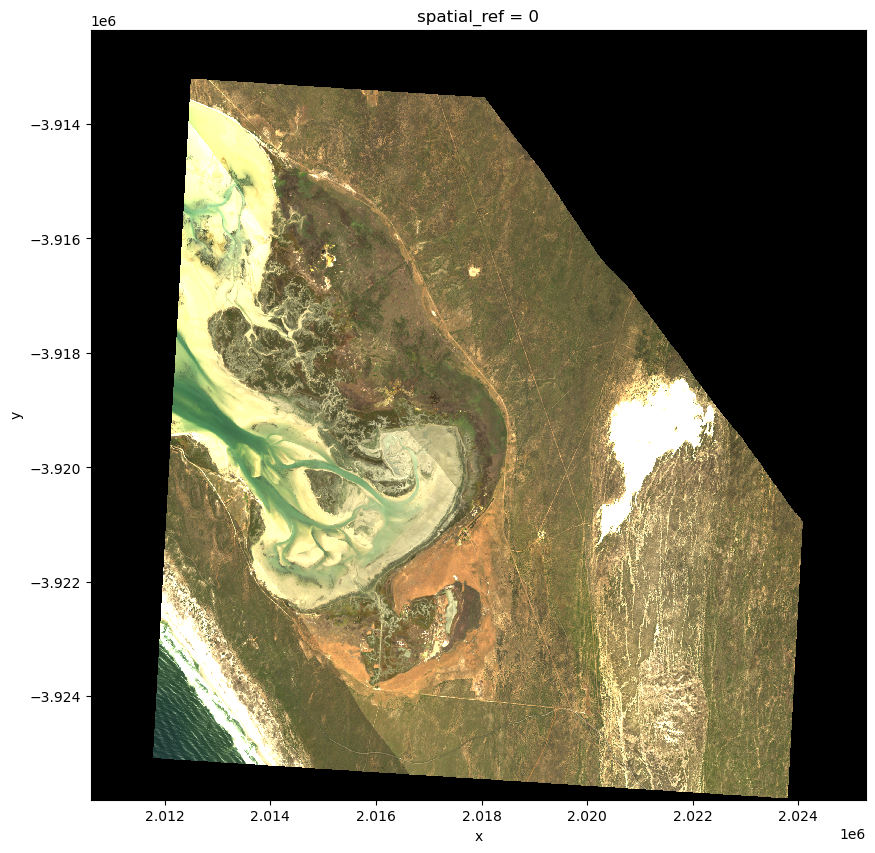

In [19]:
import rioxarray
import matplotlib.pyplot as plt

# Open the GeoTIFF file
raster = rioxarray.open_rasterio(gtiff_paths[7])

# Plot the RGB image
plt.figure(figsize=(10, 10))
raster.plot.imshow(rgb="band")
plt.show()

In [20]:
#gtiff_paths = earthaccess.open(gtiff_arr, provider="ORNL_CLOUD")

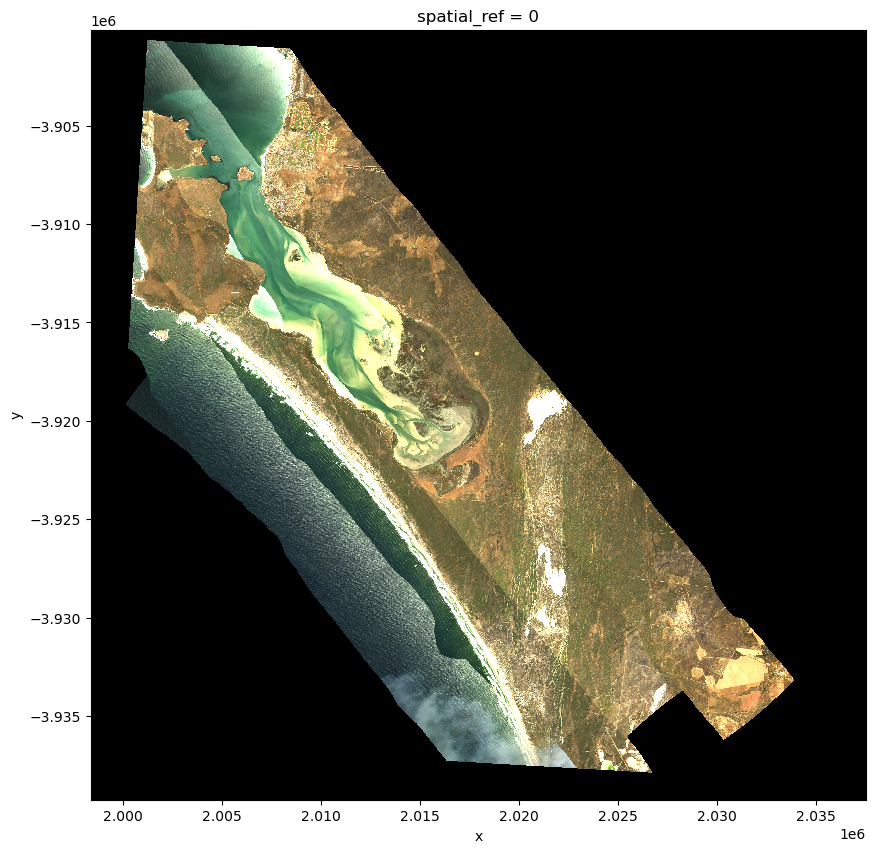

In [22]:
import rioxarray as rx
import rasterio
from rioxarray import merge

data_arrays = []
for g in gtiff_paths:
    data_arrays.append(rx.open_rasterio(g))

merged_array = rx.merge.merge_arrays(data_arrays, method='last')
merged_array.rio.to_raster('merged_image.tif')

plt.figure(figsize=(10, 10))
merged_array.plot.imshow(rgb='band')
plt.show()

### Let's get the Reflectance File S3 Links

In [23]:
def get_s3_links(g, suffix_str):
    return [i for i in g.data_links(access="direct") if i.endswith(suffix_str)][0]

rfl_f = []
for g in results:
    rfl_f.append(get_s3_links(g, 'RFL.nc'))
rfl_f

['s3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_9_RFL.nc',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_27_7_RFL.nc',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_27_9_RFL.nc',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_7_RFL.nc',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_27_8_RFL.nc',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_25_7_RFL.nc',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_25_8_RFL.nc',
 's3://ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_8_RFL.nc']

#### Recall that these are Multifile Granules, with 3 files per Granule.  We've selected just the netCDF files in **`granule_arr`**

### Access and Visualize data via Earthdata Direct Cloud Access

Datasets in NASA Earthdata 
- NASA Earthdata is in AMAZON AWS us-west-2 region (physically in Oregon)
- Most data are in AWS Cloud Data Storage (S3) Buckets in this cloud
- You need to access Earthdata Cloud from another Cloud that is in the same region - the openscapes 2i2c Hub is in that region
- AVIRIS files can be big, you might want to process it in the cloud, saving your local device storage
- Researchers are starting to budget cloud services in proposals
- Many NASA Science Mangaged Cloud Environments (SMCE) provide EC2 to NASA Earthdata funded researchers

#### OPEN as S3FileSystem
Using **`xarray`** and the **`earthaccess.open`** function we can directly read from a remote filesystem, but not download a file.  This example is running code on a host with direct access to NASA Earthdata Cloud, so we don't need to download the data.

In [24]:
paths = earthaccess.open(rfl_f, provider="ORNL_CLOUD")

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

In [25]:
paths

[<File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_9_RFL.nc>,
 <File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_27_7_RFL.nc>,
 <File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_27_9_RFL.nc>,
 <File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_26_7_RFL.nc>,
 <File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_27_8_RFL.nc>,
 <File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE_V02_L3_25_7_RFL.nc>,
 <File-like object S3FileSystem, ornl-cumulus-prod-protected/bioscape/BioSCape_ANG_V02_L3_RFL_Mosaic/data/AVIRIS-NG_BIOSCAPE

### **`paths`** contains references to files on the remote filesystem.  The `ornl-cumulus-prod-public` is the S3 bucket in AWS us-west-2 region

The **`xarray.backends.api import open_datatree`** **import** provides a preview of the DataTree object.  Once is it fully integrated into Xarray, the additional import won't be needed as the function will be available as xr.open_datatree

Notice that this `xarray.Dataset` is limited in what is showing and has no variables.  

In [26]:
ds = xr.open_datatree(paths[3])
ds

<xarray.DataTree>
Group: /
│   Dimensions:              (easting: 2000, northing: 2000)
│   Coordinates:
│     * easting              (easting) float64 16kB 7.5e+05 7.5e+05 ... 7.6e+05
│     * northing             (northing) float64 16kB 9.3e+05 9.3e+05 ... 9.2e+05
│   Data variables:
│       transverse_mercator  |S1 1B ...
│   Attributes: (12/22)
│       Conventions:                       CF-1.6
│       date_created:                      2025-04-23T20:35:47Z
│       summary:                           Mosaic of AVIRIS-NG L2A Reflectance da...
│       keywords:                          Imaging Spectroscopy, AVIRIS, AVIRIS-NG
│       sensor:                            Airborne Visible / Infrared Imaging Sp...
│       instrument:                        AVIRIS-NG
│       ...                                ...
│       ncei_template_version:             NCEI_NetCDF_Grid_Template_v2.0
│       title:                             AVIRIS-NG L3 Mosaiced Surface Reflecta...
│       processing_level:                  L3
│       time_coverage_start:               2023-10-22T00:00:00Z
│       time_coverage_end:                 2024-11-26T23:59:59Z
│       product_version:                   002
├── Group: /reflectance
│       Dimensions:      (wavelength: 425, northing: 2000, easting: 2000)
│       Coordinates:
│         * wavelength   (wavelength) float32 2kB 377.2 382.2 ... 2.496e+03 2.501e+03
│       Data variables:
│           fwhm         (wavelength) float32 2kB ...
│           reflectance  (wavelength, northing, easting) float32 7GB ...
├── Group: /obs
│       Dimensions:             (northing: 2000, easting: 2000)
│       Data variables:
│           path_length         (northing, easting) float32 16MB ...
│           to_sensor_azimuth   (northing, easting) float32 16MB ...
│           to_sensor_zenith    (northing, easting) float32 16MB ...
│           to_sun_azimuth      (northing, easting) float32 16MB ...
│           to_sun_zenith       (northing, easting) float32 16MB ...
│           solar_phase         (northing, easting) float32 16MB ...
│           slope               (northing, easting) float32 16MB ...
│           aspect              (northing, easting) float32 16MB ...
│           cosine_i            (northing, easting) float32 16MB ...
│           utc_time            (northing, easting) float32 16MB ...
│           earth_sun_distance  (northing, easting) float32 16MB ...
└── Group: /scene_info
        Dimensions:      (northing: 2000, easting: 2000, scene_ids: 3647)
        Dimensions without coordinates: scene_ids
        Data variables:
            scene_id     (northing, easting) uint16 8MB ...
            scene_names  (scene_ids) <U22 321kB ...

#### The netCDF data model for these data includes multi-group hierarchies within a single file where each group maps to an `xarray.Dataset`.  The whole file maps to a `DataTree`.  This implementation in XArray remains under development:  https://docs.xarray.dev/en/latest/generated/xarray.DataTree.html.

In [27]:
rfl_netcdf = xr.open_datatree(paths[7], 
                              engine='h5netcdf', chunks='auto').reflectance.to_dataset()
rfl_netcdf

<xarray.Dataset> Size: 7GB
Dimensions:      (wavelength: 425, northing: 2000, easting: 2000)
Coordinates:
  * easting      (easting) float64 16kB 7.6e+05 7.6e+05 ... 7.7e+05 7.7e+05
  * northing     (northing) float64 16kB 9.3e+05 9.3e+05 ... 9.2e+05 9.2e+05
  * wavelength   (wavelength) float32 2kB 377.2 382.2 ... 2.496e+03 2.501e+03
Data variables:
    fwhm         (wavelength) float32 2kB dask.array<chunksize=(425,), meta=np.ndarray>
    reflectance  (wavelength, northing, easting) float32 7GB dask.array<chunksize=(30, 768, 768), meta=np.ndarray>

In [30]:
ds_rgb = rfl_netcdf.reflectance.sel(wavelength=[637, 552, 462], method="nearest")

In [31]:
ds_rgb.hvplot.rgb('easting', 'northing', rasterize=True,robust=True, data_aspect=1, aspect='equal', 
                  bands='wavelength', frame_width=600)

:DynamicMap   []
   :RGB   [easting,northing]   (R,G,B)

In [32]:
rfl_netcdf.reflectance.sel(easting=766305,
                   northing=927100,
                   method="nearest").hvplot.line(x='wavelength', ylim=(0,0.5), color='green')

:Curve   [wavelength]   (Mosaiced Hemispherical Directional Reflectance Factor)

### This next block of code will merge the selected files.  uncomment to run.  

In [ ]:
#s3_obj = []
#for fh in paths:
#    s3_obj.append(xr.open_datatree(fh, engine='h5netcdf', 
#                                   chunks='auto').reflectance.to_dataset())
#ds = xr.combine_by_coords(s3_obj, combine_attrs='override')